In [7]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from matplotlib import animation
from IPython.display import HTML
import torch
import torch.nn as nn
import os
from IPython.display import clear_output
import pickle
#from GravitationalNBody2d_data import *

from utils import count_parameters

In [3]:
ls logs

gravitational2objectsmodelLSTM.pickle  spring2objectsmodelLSTM.pickle
gravitational2objectsmodelLSTM.png     spring2objectsmodelLSTM.png
gravitational2objectsmodelMLP.pickle   spring2objectsmodelMLP.pickle
gravitational2objectsmodelMLP.png      spring2objectsmodelMLP.png
gravitational2objectsmodelRNN.pickle   spring2objectsmodelRNN.pickle
gravitational2objectsmodelRNN.png      spring2objectsmodelRNN.png
gravitational3objectsmodelLSTM.pickle  spring3objectsmodelLSTM.pickle
gravitational3objectsmodelLSTM.png     spring3objectsmodelLSTM.png
gravitational3objectsmodelMLP.pickle   spring3objectsmodelMLP.pickle
gravitational3objectsmodelMLP.png      spring3objectsmodelMLP.png
gravitational3objectsmodelRNN.pickle   spring3objectsmodelRNN.pickle
gravitational3objectsmodelRNN.png      spring3objectsmodelRNN.png


In [9]:
print(list(itertools.product(model_types, physical_systems)))

[('MLP', 'spring'), ('MLP', 'gravitational'), ('RNN', 'spring'), ('RNN', 'gravitational'), ('LSTM', 'spring'), ('LSTM', 'gravitational')]


In [50]:
model_types = ['MLP','RNN','LSTM']
physical_systems = ['spring', 'gravitational']
#nums_of_objects = [2]


In [53]:
def make_plot(n_object):
    nums_of_objects = [n_object]
    results = {}
    for p, n, m in itertools.product(physical_systems, nums_of_objects, model_types):
        #print('log/' + p + str(n) + 'objectsmodel' + m + '.pickle')
        label = p + str(n) + m
        result = pickle.load((open('logs/' + p + str(n) + 'objectsmodel' + m + '.pickle', 'rb')))
        results[label] = result 

    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,7), sharey = True)
    for r in results:
        train_loss = results[r]['train_loss']
        val_loss = results[r]['val_loss']
        p1 = ax1.semilogy(train_loss[:10000])
        p2 = ax2.semilogy(val_loss[:10000], color = p1[0].get_color(), label = r)

    ax1.set_title('Training Error')
    ax2.set_title('Validation Error')
    ax2.legend()
    plt.suptitle(str(n_object)+' objects', fontsize = 20)
    plt.show()

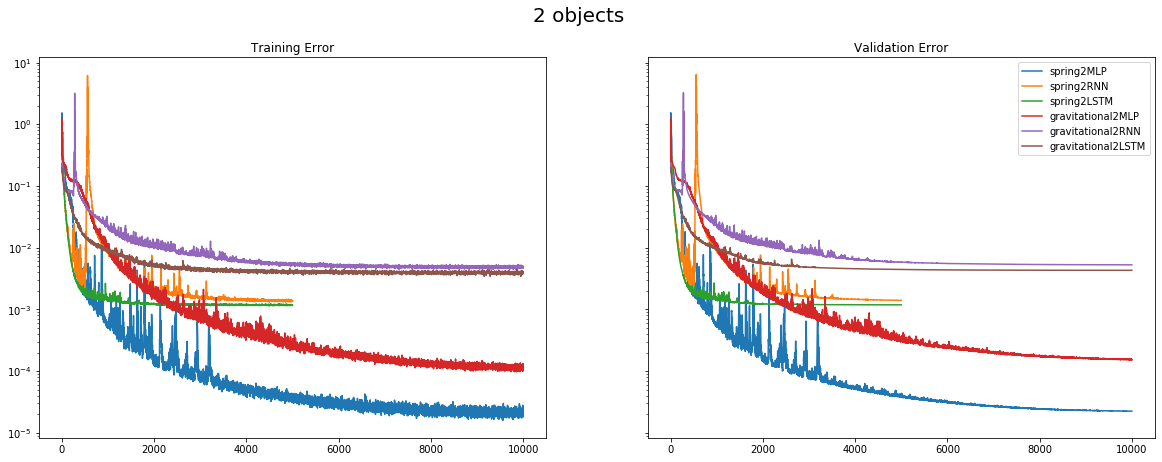

In [54]:
make_plot(2)

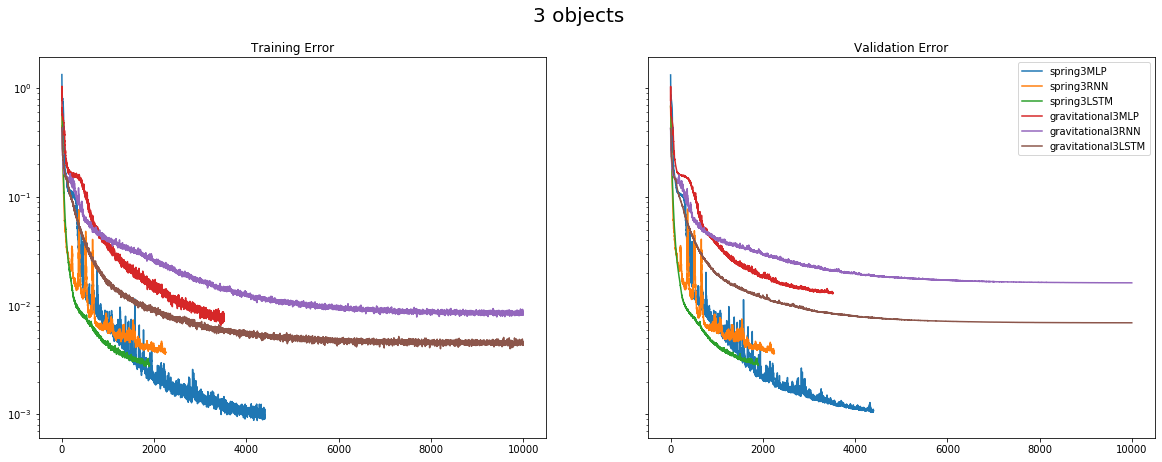

In [64]:
make_plot(3)